# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [2]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [3]:
df = pd.read_csv('marketing.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [6]:
null_rows=df.isnull().sum().sum()
all_rows=df.shape[0]
per_of_null=(null_rows/all_rows)*100
per_of_null

df2=df.fillna('NaN')
df2.isnull().sum()
#No null values are showing. They are replaced with NAN



ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [7]:
df.drop_duplicates(inplace=True)


### 5. Drop the columns which you think redundant for the analysis 

In [ ]:
# I dont find any column to be redundant

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [8]:
df['Marital_Status'] = np.where((df['Marital_Status'] == 'Married') | (df['Marital_Status'] == 'Together'), 'relationship', df['Marital_Status'])

df['Marital_Status'] = np.where((df['Marital_Status'] == 'Divorced') | (df['Marital_Status'] == 'Widow')  | (df['Marital_Status'] == 'Alone') | (df['Marital_Status'] == 'YOLO') | (df['Marital_Status'] == 'Absurd')
,'Single',df['Marital_Status'])

df['Marital_Status'].value_counts()

relationship    1444
Single           796
Name: Marital_Status, dtype: int64

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [9]:
df['Total_Expenses']=df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] +df['MntGoldProds']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,4,7,0,0,0,0,0,0,1,1617
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,2,5,0,0,0,0,0,0,0,27
2,4141,1965,Graduation,relationship,71613.0,0,0,21-08-2013,26,426,...,10,4,0,0,0,0,0,0,0,776
3,6182,1984,Graduation,relationship,26646.0,1,0,10/2/2014,26,11,...,4,6,0,0,0,0,0,0,0,53
4,5324,1981,PhD,relationship,58293.0,1,0,19-01-2014,94,173,...,6,5,0,0,0,0,0,0,0,422


### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [10]:
df['Num_Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses,Num_Total_Purchases
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,1,1617,25
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,0,27,6
2,4141,1965,Graduation,relationship,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,0,776,21
3,6182,1984,Graduation,relationship,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,0,53,8
4,5324,1981,PhD,relationship,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,0,422,19


### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [11]:
df['Kids']=df['Kidhome']+df['Teenhome']
df[['Kidhome','Teenhome','Kids']]

,Kidhome,Teenhome,Kids
0,0,0,0
1,1,1,2
2,0,0,0
3,1,0,1
4,1,0,1
...,...,...,...
2235,0,1,1
2236,2,1,3
2237,0,0,0
2238,0,1,1


### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [14]:
df['TotalAcceptedCmp']=df['AcceptedCmp1']+df['AcceptedCmp3']+df['AcceptedCmp2']+df['AcceptedCmp4']+df['AcceptedCmp5']

### 11. Drop those columns which we have used above for obtaining new features

In [17]:
df.drop(['AcceptedCmp1','AcceptedCmp3','AcceptedCmp2','AcceptedCmp4','AcceptedCmp5','Kidhome','Teenhome','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'],axis=1)

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,NumWebVisitsMonth,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,5524,1957,Graduation,Single,58138.0,4/9/2012,58,7,0,1,1617,25,0,0
1,2174,1954,Graduation,Single,46344.0,8/3/2014,38,5,0,0,27,6,2,0
2,4141,1965,Graduation,relationship,71613.0,21-08-2013,26,4,0,0,776,21,0,0
3,6182,1984,Graduation,relationship,26646.0,10/2/2014,26,6,0,0,53,8,1,0
4,5324,1981,PhD,relationship,58293.0,19-01-2014,94,5,0,0,422,19,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,relationship,61223.0,13-06-2013,46,5,0,0,1341,18,1,0
2236,4001,1946,PhD,relationship,64014.0,10/6/2014,56,7,0,0,444,22,3,1
2237,7270,1981,Graduation,Single,56981.0,25-01-2014,91,6,0,0,1241,19,0,1
2238,8235,1956,Master,relationship,69245.0,24-01-2014,8,3,0,0,843,23,1,0


### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [24]:
from datetime import datetime
currentYear = datetime.now().year
df['age']=currentYear-df['Year_Birth']
df['age']
df.drop(['Year_Birth'],axis=1)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age
0,5524,Graduation,Single,58138.0,0,0,4/9/2012,58,635,88,...,0,0,0,0,1,1617,25,0,0,66
1,2174,Graduation,Single,46344.0,1,1,8/3/2014,38,11,1,...,0,0,0,0,0,27,6,2,0,69
2,4141,Graduation,relationship,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,0,0,776,21,0,0,58
3,6182,Graduation,relationship,26646.0,1,0,10/2/2014,26,11,4,...,0,0,0,0,0,53,8,1,0,39
4,5324,PhD,relationship,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,0,0,422,19,1,0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,relationship,61223.0,0,1,13-06-2013,46,709,43,...,0,0,0,0,0,1341,18,1,0,56
2236,4001,PhD,relationship,64014.0,2,1,10/6/2014,56,406,0,...,0,1,0,0,0,444,22,3,1,77
2237,7270,Graduation,Single,56981.0,0,0,25-01-2014,91,908,48,...,0,0,0,0,0,1241,19,0,1,42
2238,8235,Master,relationship,69245.0,0,1,24-01-2014,8,428,30,...,0,0,0,0,0,843,23,1,0,67


### 13. Encode the categorical variables in the dataset

In [25]:
le=LabelEncoder()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [27]:
df.iloc[:,[2,3,7]]=df.iloc[:,[2,3,7]].apply(le.fit_transform)

In [28]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age
0,5524,1957,2,0,58138.0,0,0,553,58,635,...,0,0,0,0,1,1617,25,0,0,66
1,2174,1954,2,0,46344.0,1,1,629,38,11,...,0,0,0,0,0,27,6,2,0,69
2,4141,1965,2,1,71613.0,0,0,293,26,426,...,0,0,0,0,0,776,21,0,0,58
3,6182,1984,2,1,26646.0,1,0,31,26,11,...,0,0,0,0,0,53,8,1,0,39
4,5324,1981,4,1,58293.0,1,0,216,94,173,...,0,0,0,0,0,422,19,1,0,42


### 14. Standardize the columns, so that values are in a particular range

In [32]:
for i in df.columns:
    df[i]=(df[i] - df[i].mean()) / df[i].std()
    print(df[i])

0      -0.020994
1      -1.052823
2      -0.446970
3       0.181676
4      -0.082596
          ...   
2235    1.625620
2236   -0.490091
2237    0.516789
2238    0.814018
2239    1.174388
Name: ID, Length: 2240, dtype: float64
0      -0.985125
1      -1.235457
2      -0.317572
3       1.267866
4       1.017534
          ...   
2235   -0.150684
2236   -1.903010
2237    1.017534
2238   -1.068569
2239   -1.235457
Name: Year_Birth, Length: 2240, dtype: float64
0      -0.350063
1      -0.350063
2      -0.350063
3      -0.350063
4       1.428035
          ...   
2235   -0.350063
2236    1.428035
2237   -0.350063
2238    0.538986
2239    1.428035
Name: Education, Length: 2240, dtype: float64
0      -1.346574
1      -1.346574
2       0.742294
3       0.742294
4       0.742294
          ...   
2235    0.742294
2236    0.742294
2237   -1.346574
2238    0.742294
2239    0.742294
Name: Marital_Status, Length: 2240, dtype: float64
0       0.234010
1      -0.234507
2       0.769304
3      -1.017009
4

### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [47]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch


In [62]:
df.select_dtypes(include=[np.number])
df=df.dropna()


In [63]:
def apply_pca(df, n_components):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(df)
    explained_variance_ratio = np.sum(pca.explained_variance_ratio_)
    return pca_result, explained_variance_ratio

In [65]:
def find_optimal_n_components(df, variance_threshold):
    pca = PCA()
    pca.fit(df)
    explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.argmax(explained_variance_ratio_cumsum >= variance_threshold) + 1
    return n_components

In [71]:
pc_result,explained_Variance_ratio=apply_pca(df,2)

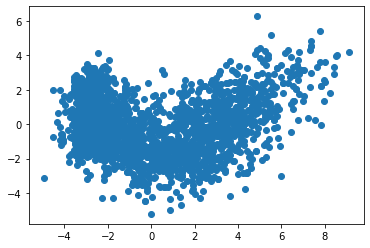

In [74]:
plot = plt.scatter(pc_result[:,0], pc_result[:,1])

### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [77]:
def apply_kmeans(pca_result, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    cluster_labels = kmeans.fit_predict(data)
    return cluster_labels

In [80]:
apply_kmeans(pc_result,10)

array([1, 6, 5, ..., 9, 8, 6])

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

In [82]:
def apply_agglomerative(data, n_clusters):
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = agglomerative.fit_predict(data)
    return cluster_labels

In [85]:
agglomerative=apply_agglomerative(pc_result,10);

### Visualization and Interpretation of results

[4 7 3 ... 8 6 0]


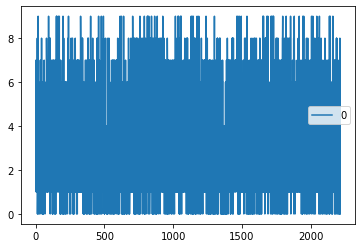

In [96]:
print(agglomerative)
df1=pd.DataFrame(agglomerative)
df1.plot()
plt.show()

-----
## Happy Learning
-----